# May 12th

In [15]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler

In [16]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [17]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [18]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [19]:
#gather 1000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-05-12', tweet_mode='extended').items(1000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [20]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,"@binance A Daily,Weekly And Monthly Draw\nLife..."
1,@iamjosephyoung @AidiToken is project of the 2...
2,@bitgertbrise @safemoon @Shibtoken @InuSaitama...
3,#Racingland a good #Metaverse project with #Pl...
4,"@binance A Daily,Weekly And Monthly Draw\nLife..."
5,@intocryptoverse Yes you're so smart to say a ...
6,"Mike Lindell, go ahead and create a Bitcoin wa..."
7,🌤️Good morning everyone! ☕\n\nHaving crypto is...
8,#Buterin Asks @Twitter Followers Which #Crypto...
9,#linkedin #twitter #facebook #instagram #bitco...


In [21]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [22]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,"@binance A Daily,Weekly And Monthly Draw\nLife...","@binance A Daily,Weekly And Monthly DrawLifeti..."
1,@iamjosephyoung @AidiToken is project of the 2...,@iamjosephyoung @AidiToken is project of the 2...
2,@bitgertbrise @safemoon @Shibtoken @InuSaitama...,@bitgertbrise @safemoon @Shibtoken @InuSaitama...
3,#Racingland a good #Metaverse project with #Pl...,a good project with games $RALD token's is...
4,"@binance A Daily,Weekly And Monthly Draw\nLife...","@binance A Daily,Weekly And Monthly DrawLifeti..."


In [23]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,"@binance A Daily,Weekly And Monthly Draw\nLife...","@binance A Daily,Weekly And Monthly DrawLifeti...",0.400000,0.800000
1,@iamjosephyoung @AidiToken is project of the 2...,@iamjosephyoung @AidiToken is project of the 2...,0.475000,0.175000
2,@bitgertbrise @safemoon @Shibtoken @InuSaitama...,@bitgertbrise @safemoon @Shibtoken @InuSaitama...,0.000000,0.000000
3,#Racingland a good #Metaverse project with #Pl...,a good project with games $RALD token's is...,0.700000,0.600000
4,"@binance A Daily,Weekly And Monthly Draw\nLife...","@binance A Daily,Weekly And Monthly DrawLifeti...",0.400000,0.800000
5,@intocryptoverse Yes you're so smart to say a ...,@intocryptoverse Yes you're so smart to say a ...,0.642857,0.267857
6,"Mike Lindell, go ahead and create a Bitcoin wa...","Mike Lindell, go ahead and create a Bitcoin wa...",0.800000,0.400000
7,🌤️Good morning everyone! ☕\n\nHaving crypto is...,🌤️Good morning everyone! ☕Having crypto is lik...,1.000000,0.750000
8,#Buterin Asks @Twitter Followers Which #Crypto...,Asks @Twitter Followers Which They Prefer to...,0.383333,0.100000
9,#linkedin #twitter #facebook #instagram #bitco...,bitcoin Delivers the to you ...,0.000000,0.000000


In [24]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [25]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,"@binance A Daily,Weekly And Monthly Draw\nLife...","@binance A Daily,Weekly And Monthly DrawLifeti...",0.400000,0.800000,Positive
1,@iamjosephyoung @AidiToken is project of the 2...,@iamjosephyoung @AidiToken is project of the 2...,0.475000,0.175000,Positive
2,@bitgertbrise @safemoon @Shibtoken @InuSaitama...,@bitgertbrise @safemoon @Shibtoken @InuSaitama...,0.000000,0.000000,Neutral
3,#Racingland a good #Metaverse project with #Pl...,a good project with games $RALD token's is...,0.700000,0.600000,Positive
4,"@binance A Daily,Weekly And Monthly Draw\nLife...","@binance A Daily,Weekly And Monthly DrawLifeti...",0.400000,0.800000,Positive
5,@intocryptoverse Yes you're so smart to say a ...,@intocryptoverse Yes you're so smart to say a ...,0.642857,0.267857,Positive
6,"Mike Lindell, go ahead and create a Bitcoin wa...","Mike Lindell, go ahead and create a Bitcoin wa...",0.800000,0.400000,Positive
7,🌤️Good morning everyone! ☕\n\nHaving crypto is...,🌤️Good morning everyone! ☕Having crypto is lik...,1.000000,0.750000,Positive
8,#Buterin Asks @Twitter Followers Which #Crypto...,Asks @Twitter Followers Which They Prefer to...,0.383333,0.100000,Positive
9,#linkedin #twitter #facebook #instagram #bitco...,bitcoin Delivers the to you ...,0.000000,0.000000,Neutral


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


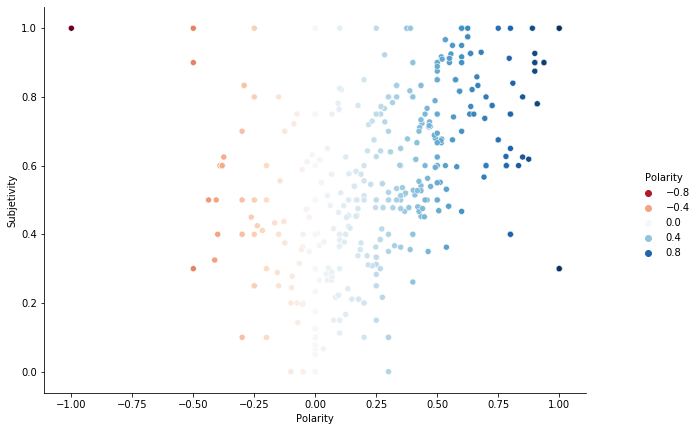

In [26]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

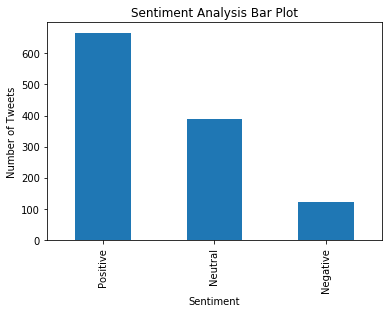

In [27]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [28]:
df['Sentiment'].value_counts()

Positive    666
Neutral     390
Negative    122
Name: Sentiment, dtype: int64

In [ ]:
lst_df = list(df['Sentiment'].value_counts())
lst_df

In [ ]:
dfs = pd.read_csv("f_sentiments.csv")
  
# updating the column value/data
dfs.loc[2, 'Sentiment'] = 'day 3'
dfs.loc[2, 'Positive'] = lst_df[0]
dfs.loc[2, 'Neutral'] = lst_df[1]
dfs.loc[2, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("f_sentiments.csv", index=False)
  
print(dfs)

In [ ]:
#666 390 122